In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##data read


In [3]:
data=pd.read_csv("/content/heart_disease.csv")
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


##EDA


In [4]:
df=data.copy()

In [5]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [7]:
df.shape

(10000, 21)

In [8]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [9]:
df.isna().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [10]:
df=df.dropna()

In [11]:
df.isna().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
for col in df.select_dtypes(include=['object']):
  values=df[col].value_counts()
  num_of_values=df[col].nunique()
  print(f"data shape {df.shape}\n values in {col} \n \n {values} \n \nnum_of_values = {num_of_values}\n data type {df[col].dtype}\n__________________________________")

data shape (7067, 21)
 values in Gender 
 
 Gender
Male      3564
Female    3503
Name: count, dtype: int64 
 
num_of_values = 2
 data type object
__________________________________
data shape (7067, 21)
 values in Exercise Habits 
 
 Exercise Habits
High      2413
Medium    2336
Low       2318
Name: count, dtype: int64 
 
num_of_values = 3
 data type object
__________________________________
data shape (7067, 21)
 values in Smoking 
 
 Smoking
Yes    3634
No     3433
Name: count, dtype: int64 
 
num_of_values = 2
 data type object
__________________________________
data shape (7067, 21)
 values in Family Heart Disease 
 
 Family Heart Disease
No     3540
Yes    3527
Name: count, dtype: int64 
 
num_of_values = 2
 data type object
__________________________________
data shape (7067, 21)
 values in Diabetes 
 
 Diabetes
No     3551
Yes    3516
Name: count, dtype: int64 
 
num_of_values = 2
 data type object
__________________________________
data shape (7067, 21)
 values in High Blood Pr

In [14]:
for col in df.select_dtypes(include=['number']):
  values=df[col].value_counts()
  num_of_values=df[col].nunique()
  print(f"data shape {df.shape}\n values in {col} \n \n {values} \n \nnum_of_values = {num_of_values}\n data type {df[col].dtype}\n__________________________________")

data shape (7067, 21)
 values in Age 
 
 Age
64.0    145
76.0    135
43.0    133
38.0    130
71.0    129
       ... 
44.0     97
63.0     94
69.0     87
24.0     86
48.0     80
Name: count, Length: 63, dtype: int64 
 
num_of_values = 63
 data type float64
__________________________________
data shape (7067, 21)
 values in Blood Pressure 
 
 Blood Pressure
134.0    147
171.0    134
129.0    134
170.0    134
167.0    133
        ... 
161.0     99
156.0     97
131.0     96
130.0     96
125.0     95
Name: count, Length: 61, dtype: int64 
 
num_of_values = 61
 data type float64
__________________________________
data shape (7067, 21)
 values in Cholesterol Level 
 
 Cholesterol Level
193.0    69
186.0    69
185.0    64
255.0    59
216.0    59
         ..
157.0    35
218.0    34
169.0    34
298.0    32
271.0    31
Name: count, Length: 151, dtype: int64 
 
num_of_values = 151
 data type float64
__________________________________
data shape (7067, 21)
 values in BMI 
 
 BMI
25.111295    1
25.2

##Visual EDA


In [15]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,7067.000000,7067.000000,7067.000000,7067.000000,7067.000000,7067.000000,7067.000000,7067.000000,7067.000000
mean,49.301542,149.856092,224.722938,29.023933,6.982595,250.523136,119.966605,7.448118,12.444451
std,18.270030,17.606064,43.529500,6.276510,1.749378,87.051480,23.612628,4.358898,4.311619
min,18.000000,120.000000,150.000000,18.007058,4.000605,100.000000,80.000000,0.010585,5.002810
25%,34.000000,134.000000,187.000000,23.633185,5.459460,176.000000,99.000000,3.629919,8.723192
50%,49.000000,150.000000,224.000000,29.046381,6.982377,250.000000,120.000000,7.445087,12.428130
75%,65.000000,166.000000,262.000000,34.402934,8.519562,326.000000,141.000000,11.209659,16.100166
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


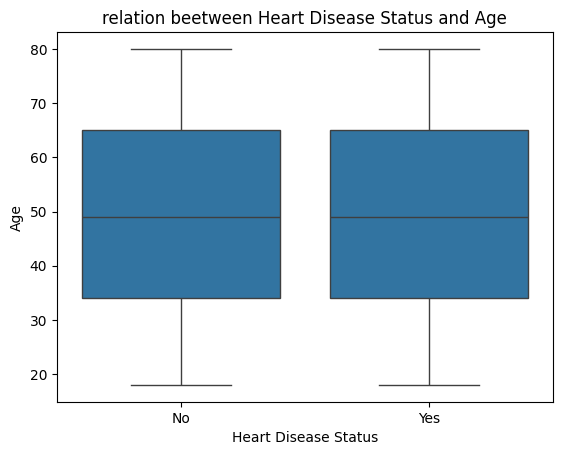

In [16]:
def boxplot (y_axis,title):
  sns.boxplot(x=df['Heart Disease Status'],y=df[y_axis])
  plt.title(title)

boxplot ('Age',"relation beetween Heart Disease Status and Age")

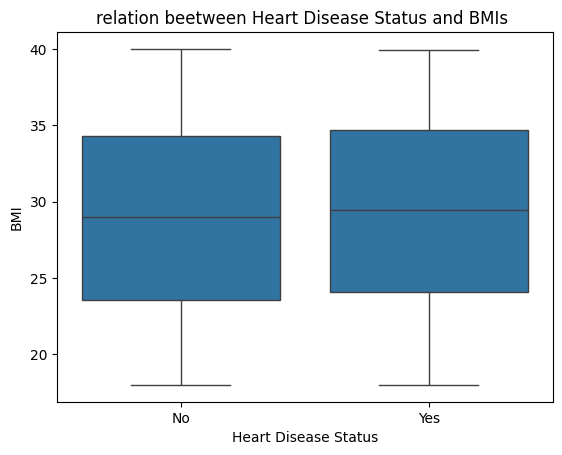

In [17]:
boxplot ('BMI',"relation beetween Heart Disease Status and BMIs ")


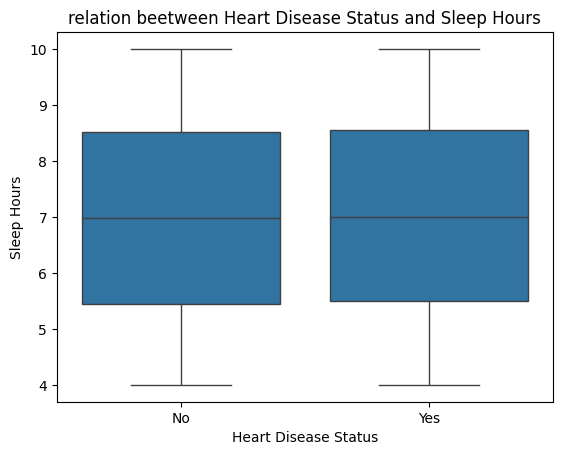

In [18]:
boxplot ('Sleep Hours',"relation beetween Heart Disease Status and Sleep Hours")


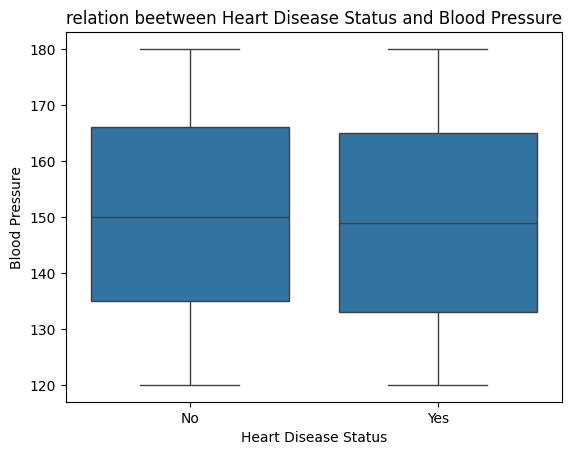

In [19]:
boxplot ('Blood Pressure',"relation beetween Heart Disease Status and Blood Pressure")

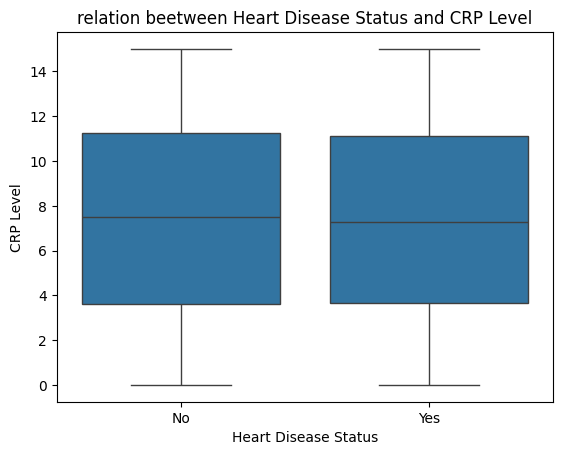

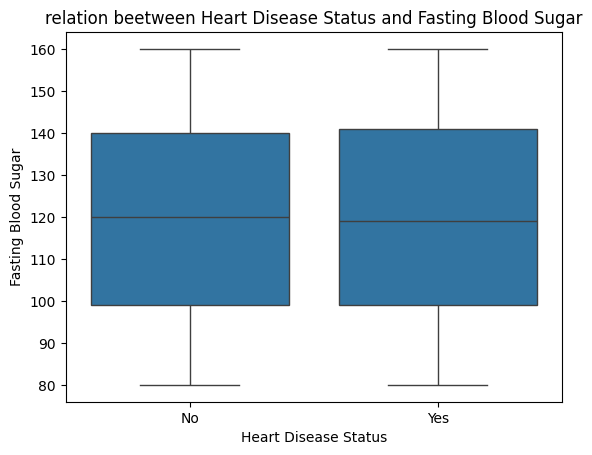

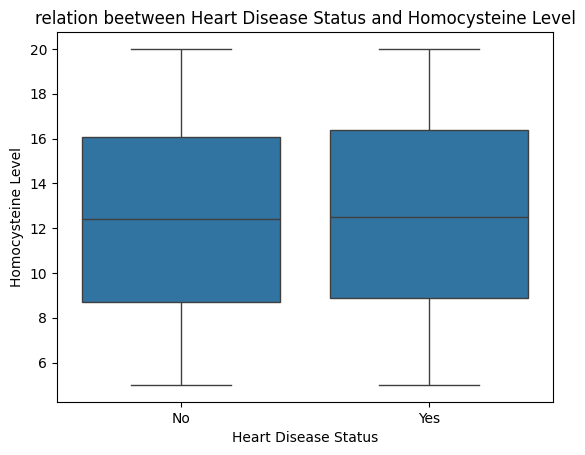

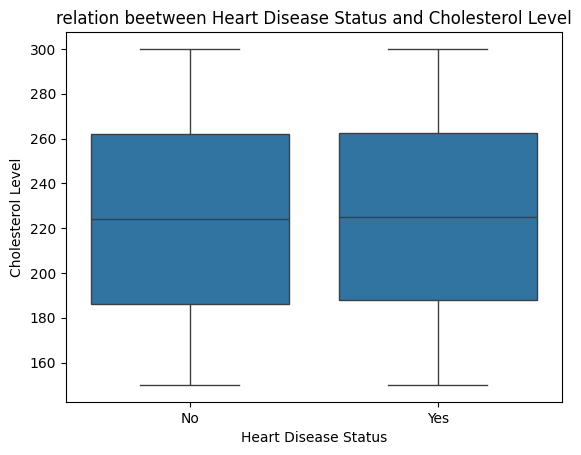

In [29]:
bio_markers = ['CRP Level', 'Fasting Blood Sugar', 'Homocysteine Level','Cholesterol Level']

for col in bio_markers:
    if col in df.columns:
        sns.boxplot(x='Heart Disease Status', y=col, data=df)
        plt.title(f"relation beetween Heart Disease Status and {col}")
        plt.show()
        print("\n\n\n")


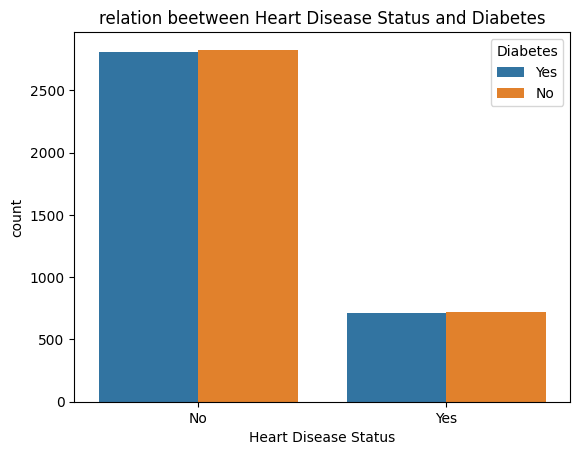

In [21]:
def countplot (label):
  sns.countplot(data=df,x=df['Heart Disease Status'],hue=df[label])
  plt.title(f"relation beetween Heart Disease Status and {label}")
countplot('Diabetes')

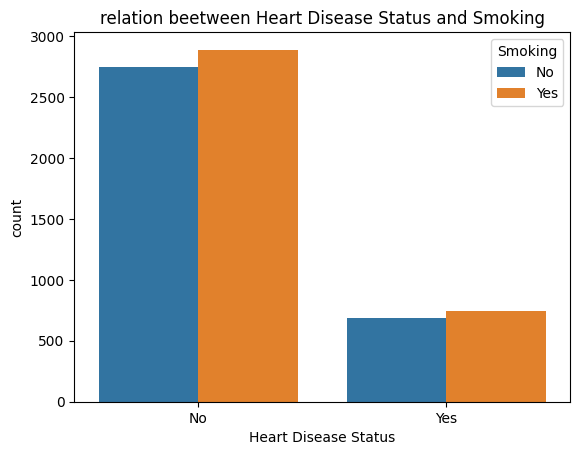

In [22]:
countplot('Smoking')

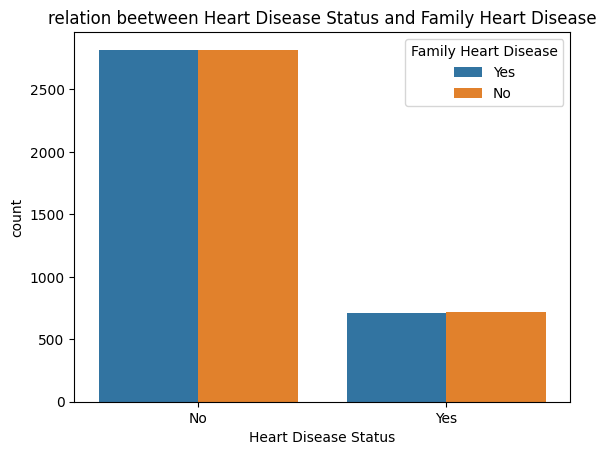

In [23]:
countplot('Family Heart Disease')

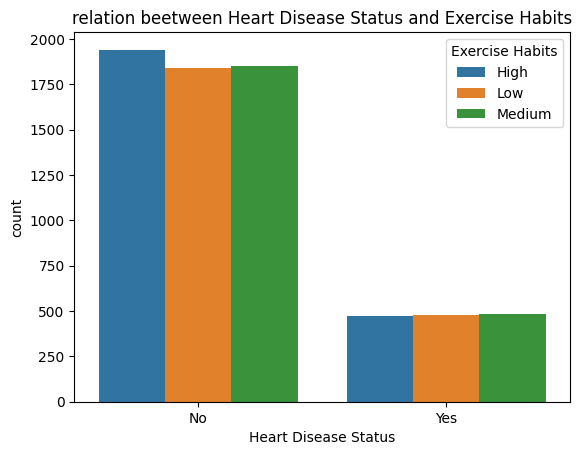

In [24]:
countplot('Exercise Habits')

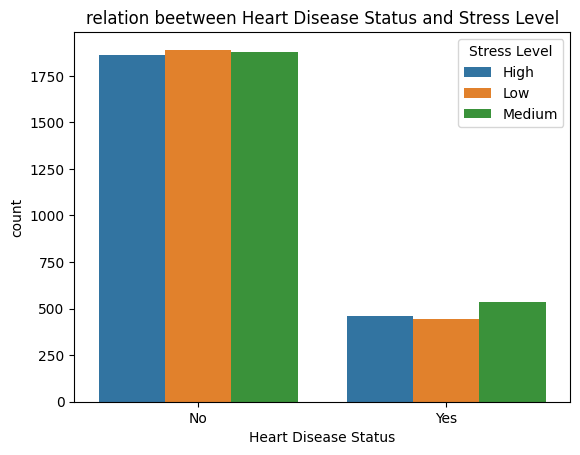

In [25]:
countplot('Stress Level')

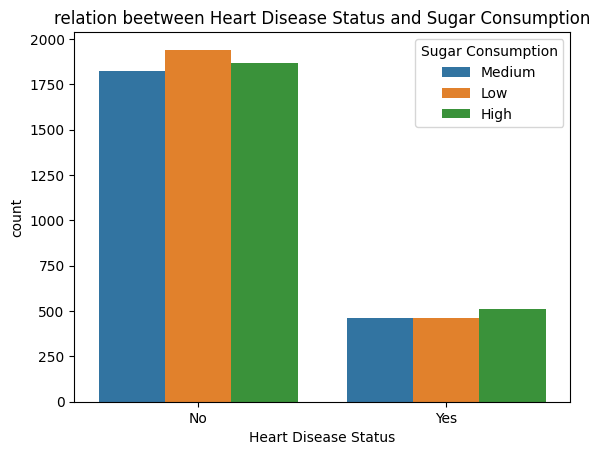

In [26]:
countplot('Sugar Consumption')

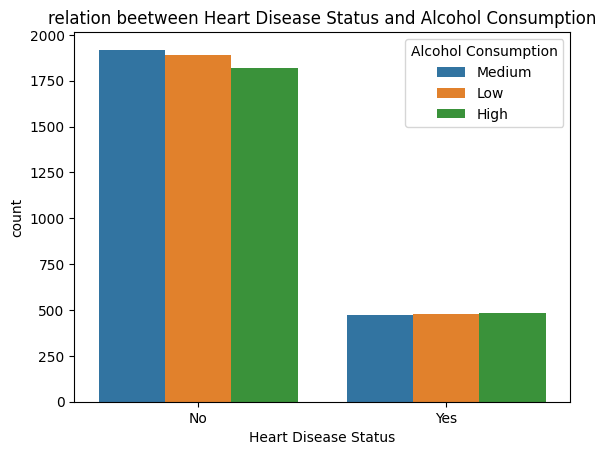

In [27]:
countplot('Alcohol Consumption')

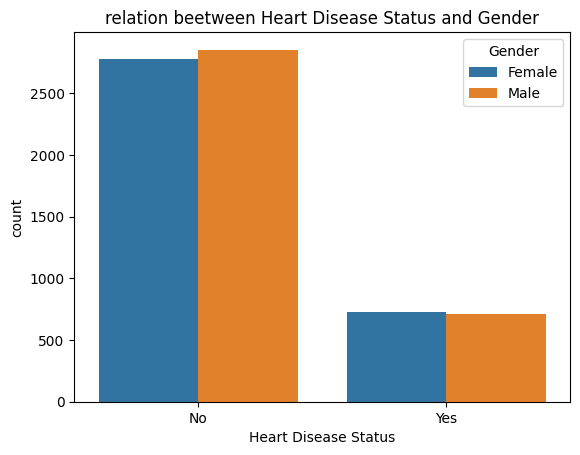

In [30]:
countplot('Gender')

<function matplotlib.pyplot.show(close=None, block=None)>

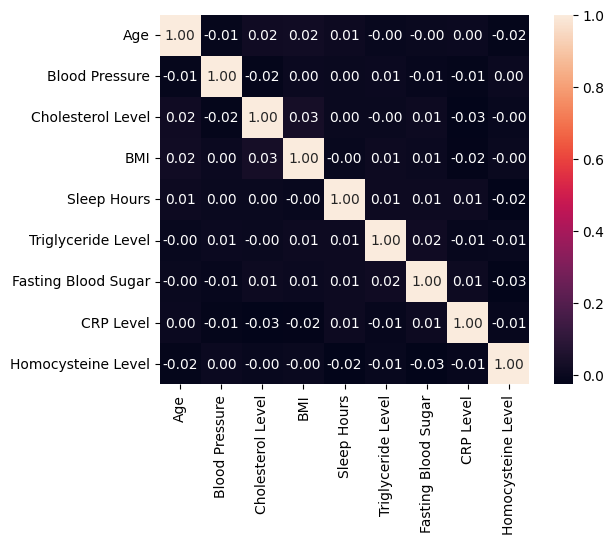

In [28]:
corr=df.select_dtypes(include=['number']).corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    square=True)
plt.show